# Lung Cancer Prediction

Two major types of lung cancer are non-small cell lung cancer and small cell lung cancer. Causes of lung cancer include smoking, second-hand smoke, exposure to certain toxins and family history.
Symptoms include a cough (often with blood), chest pain, wheezing and weight loss. These symptoms often don't appear until the cancer is advanced.

Treatments vary but may include surgery, chemotherapy, radiation therapy, targeted drug therapy and immunotherapy.


Firstly we will import all the necessary libraries in colab which we will use for further experimentation and implementations.

In [ ]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from matplotlib.colors import ListedColormap

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

%config InlineBackend.figure_format = 'retina'

We will import the csv file using the Pandas library.

In [ ]:
# Read csv File
print('\n')
df = pd.read_csv('/content/cancer patient data sets (1).csv', index_col='index')

# Display Data
display(df)
print('\n')

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
index,,,,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High


Renaming the column name capital label to lower ones for easy readability

In [ ]:
# Index Column now refers to patient

print('\n')
df.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

# Display Data After Cleaning
display(df)
print('\n')


,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High


In [ ]:
# Check For Null Values

print('\n')
df.isnull().sum()

age                         0
gender                      0
air_pollution               0
alcohol_use                 0
dust_allergy                0
occupational_hazards        0
genetic_risk                0
chronic_lung_disease        0
balanced_diet               0
obesity                     0
smoking                     0
passive_smoker              0
chest_pain                  0
coughing_of_blood           0
fatigue                     0
weight_loss                 0
shortness_of_breath         0
wheezing                    0
swallowing_difficulty       0
clubbing_of_finger_nails    0
frequent_cold               0
dry_cough                   0
snoring                     0
level                       0
dtype: int64

There is no null values in the given all columns

In [ ]:
# Print Information

print('\n')
print(df.info())
print('\n')



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                

All the columns have the integer values while level have categorical classes.

Here, just for simple understanding we will define the object class of "level" with integer classes and assigning them values.

In [ ]:
# Replace "level" with Integer

print('\n')
print('Cancer Levels: ', df['level'].unique())

# Replacing levels with int
df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', df['level'].unique())

print('\nColumns in dataframe: \n', df.columns)
print('\n')




Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')




we will have some statistical overview of this data

In [ ]:
# Round

print('\n')
round(df.describe().iloc[1:, ].T, 1)

,mean,std,min,25%,50%,75%,max
age,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,5.2,2.0,1.0,4.0,6.0,7.0,8.0
occupational_hazards,4.8,2.1,1.0,3.0,5.0,7.0,8.0
genetic_risk,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,4.5,2.1,1.0,3.0,4.0,7.0,7.0


In [ ]:
# Print and Visualize Columns

print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

**Exploratory data analysis **(EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [ ]:
# Consolidating Necessary Columns

cols = [
    'age', 'weight_loss', 'smoking'
]

cols2 = [ 'gender']

cols3 = [
    'air_pollution', 'alcohol_use', 'dust_allergy', 'smoking', 'chest_pain', 'fatigue'
]



*************************************************************************************************************************


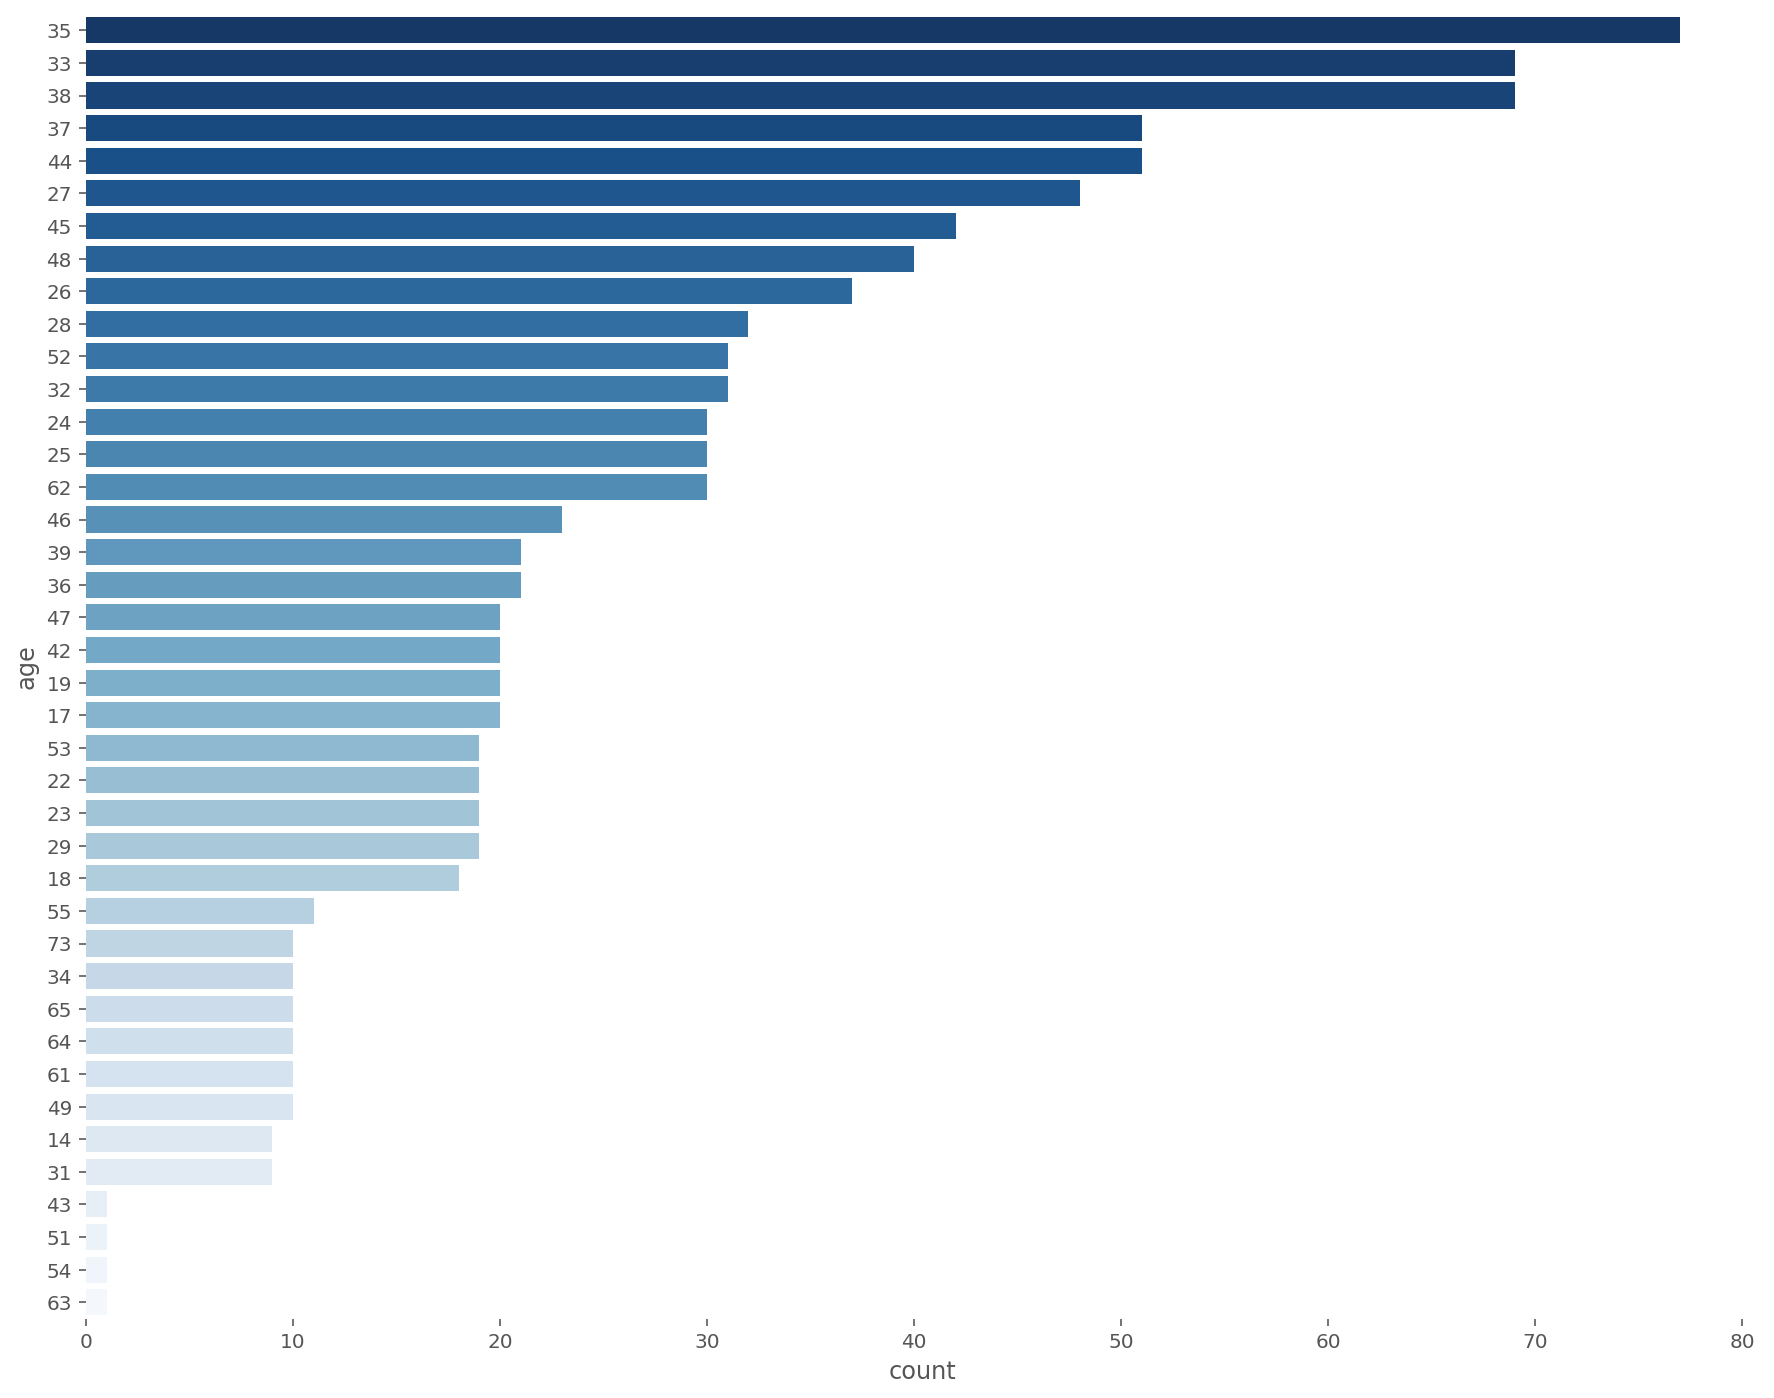

*************************************************************************************************************************


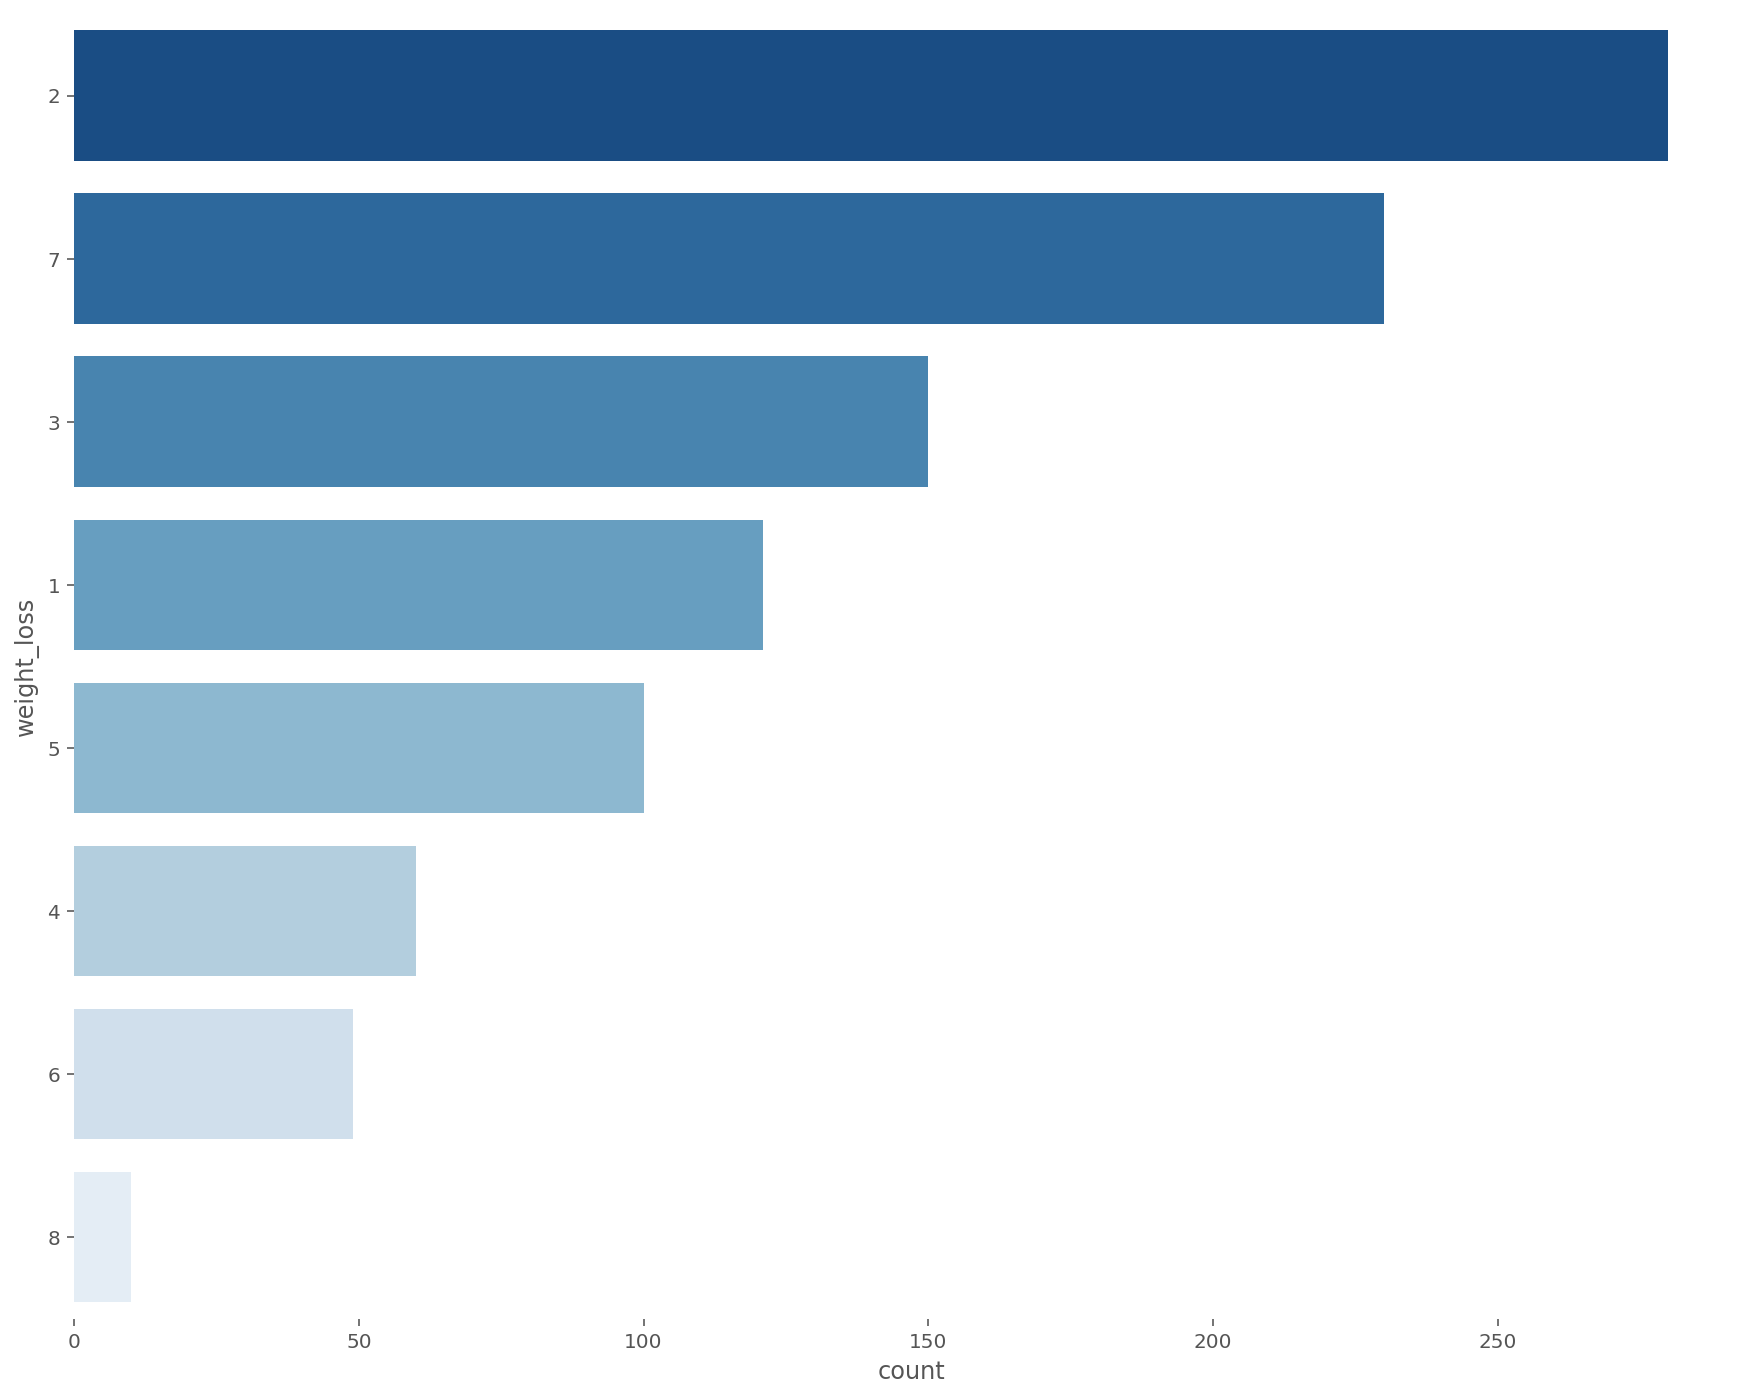

*************************************************************************************************************************


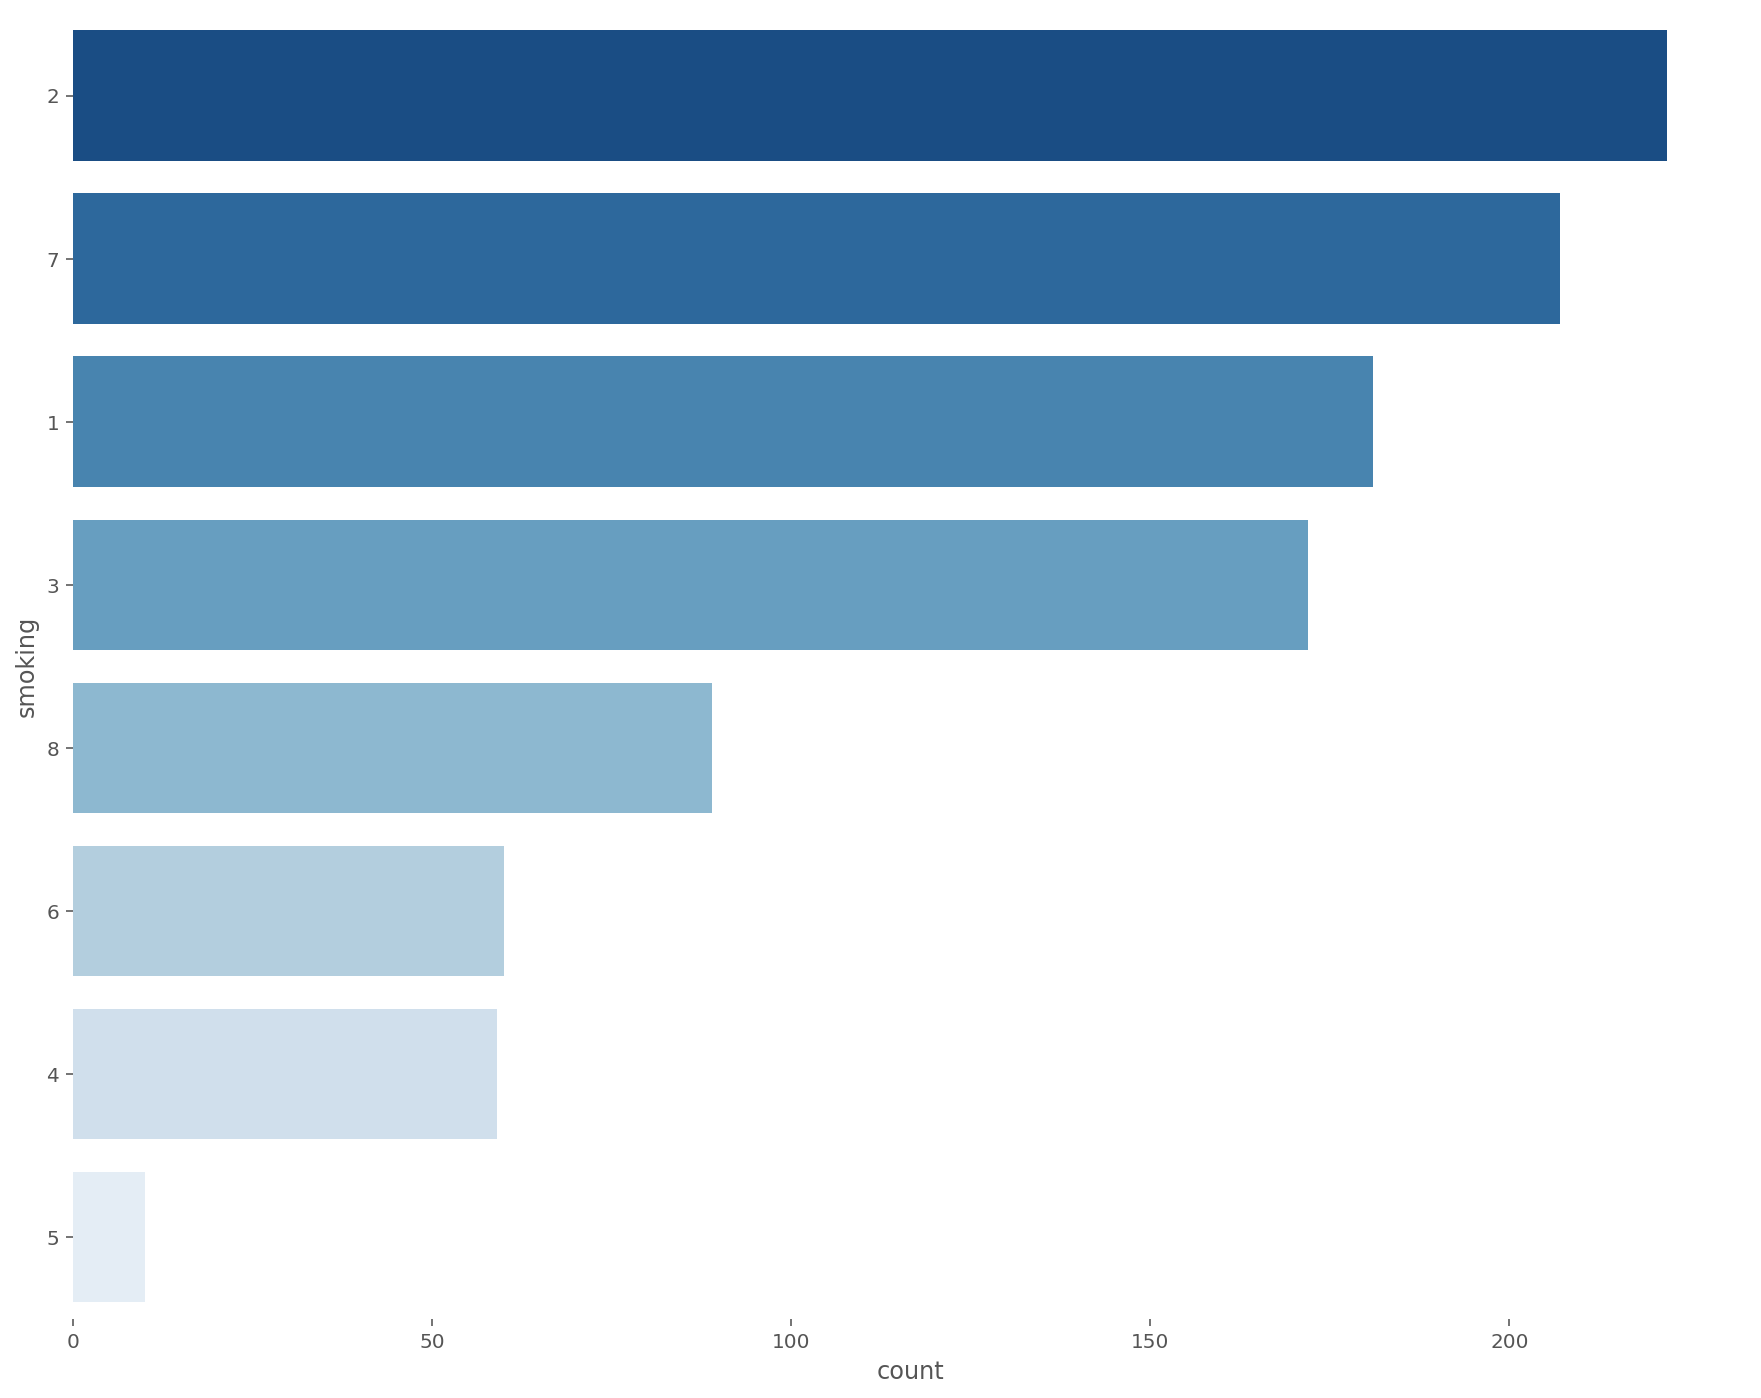

**********************************************************************************************************************


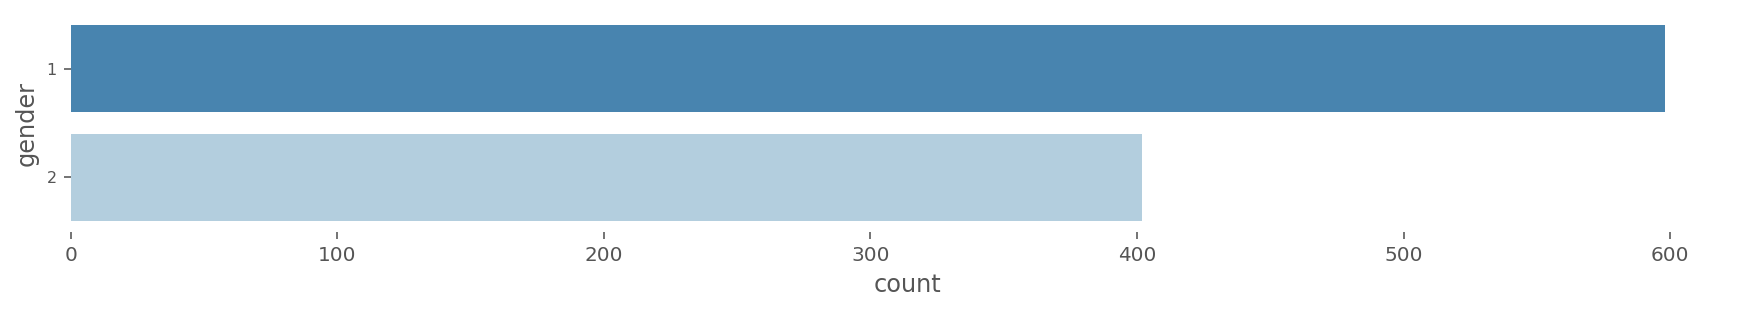

In [ ]:
#Presenting the countplots for categorical features

print('\n')
for i in cols:
  fig, ax = plt.subplots(1,1, figsize=(15, 12))
  sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
  plt.ylabel(i)
  plt.yticks(fontsize=10)
  print("*************************************************************************************************************************")
  plt.box(False)
  plt.show()

# Gender
for i in cols2:
    fig, ax = plt.subplots(1,1, figsize=(15, 2))
    sns.countplot(y = df[i],data=df, order=df[i].value_counts().index, palette='Blues_r')
    plt.ylabel(i)
    plt.yticks(fontsize=8)
    print("**********************************************************************************************************************")
    plt.box(False)
    plt.show()

print('\n')


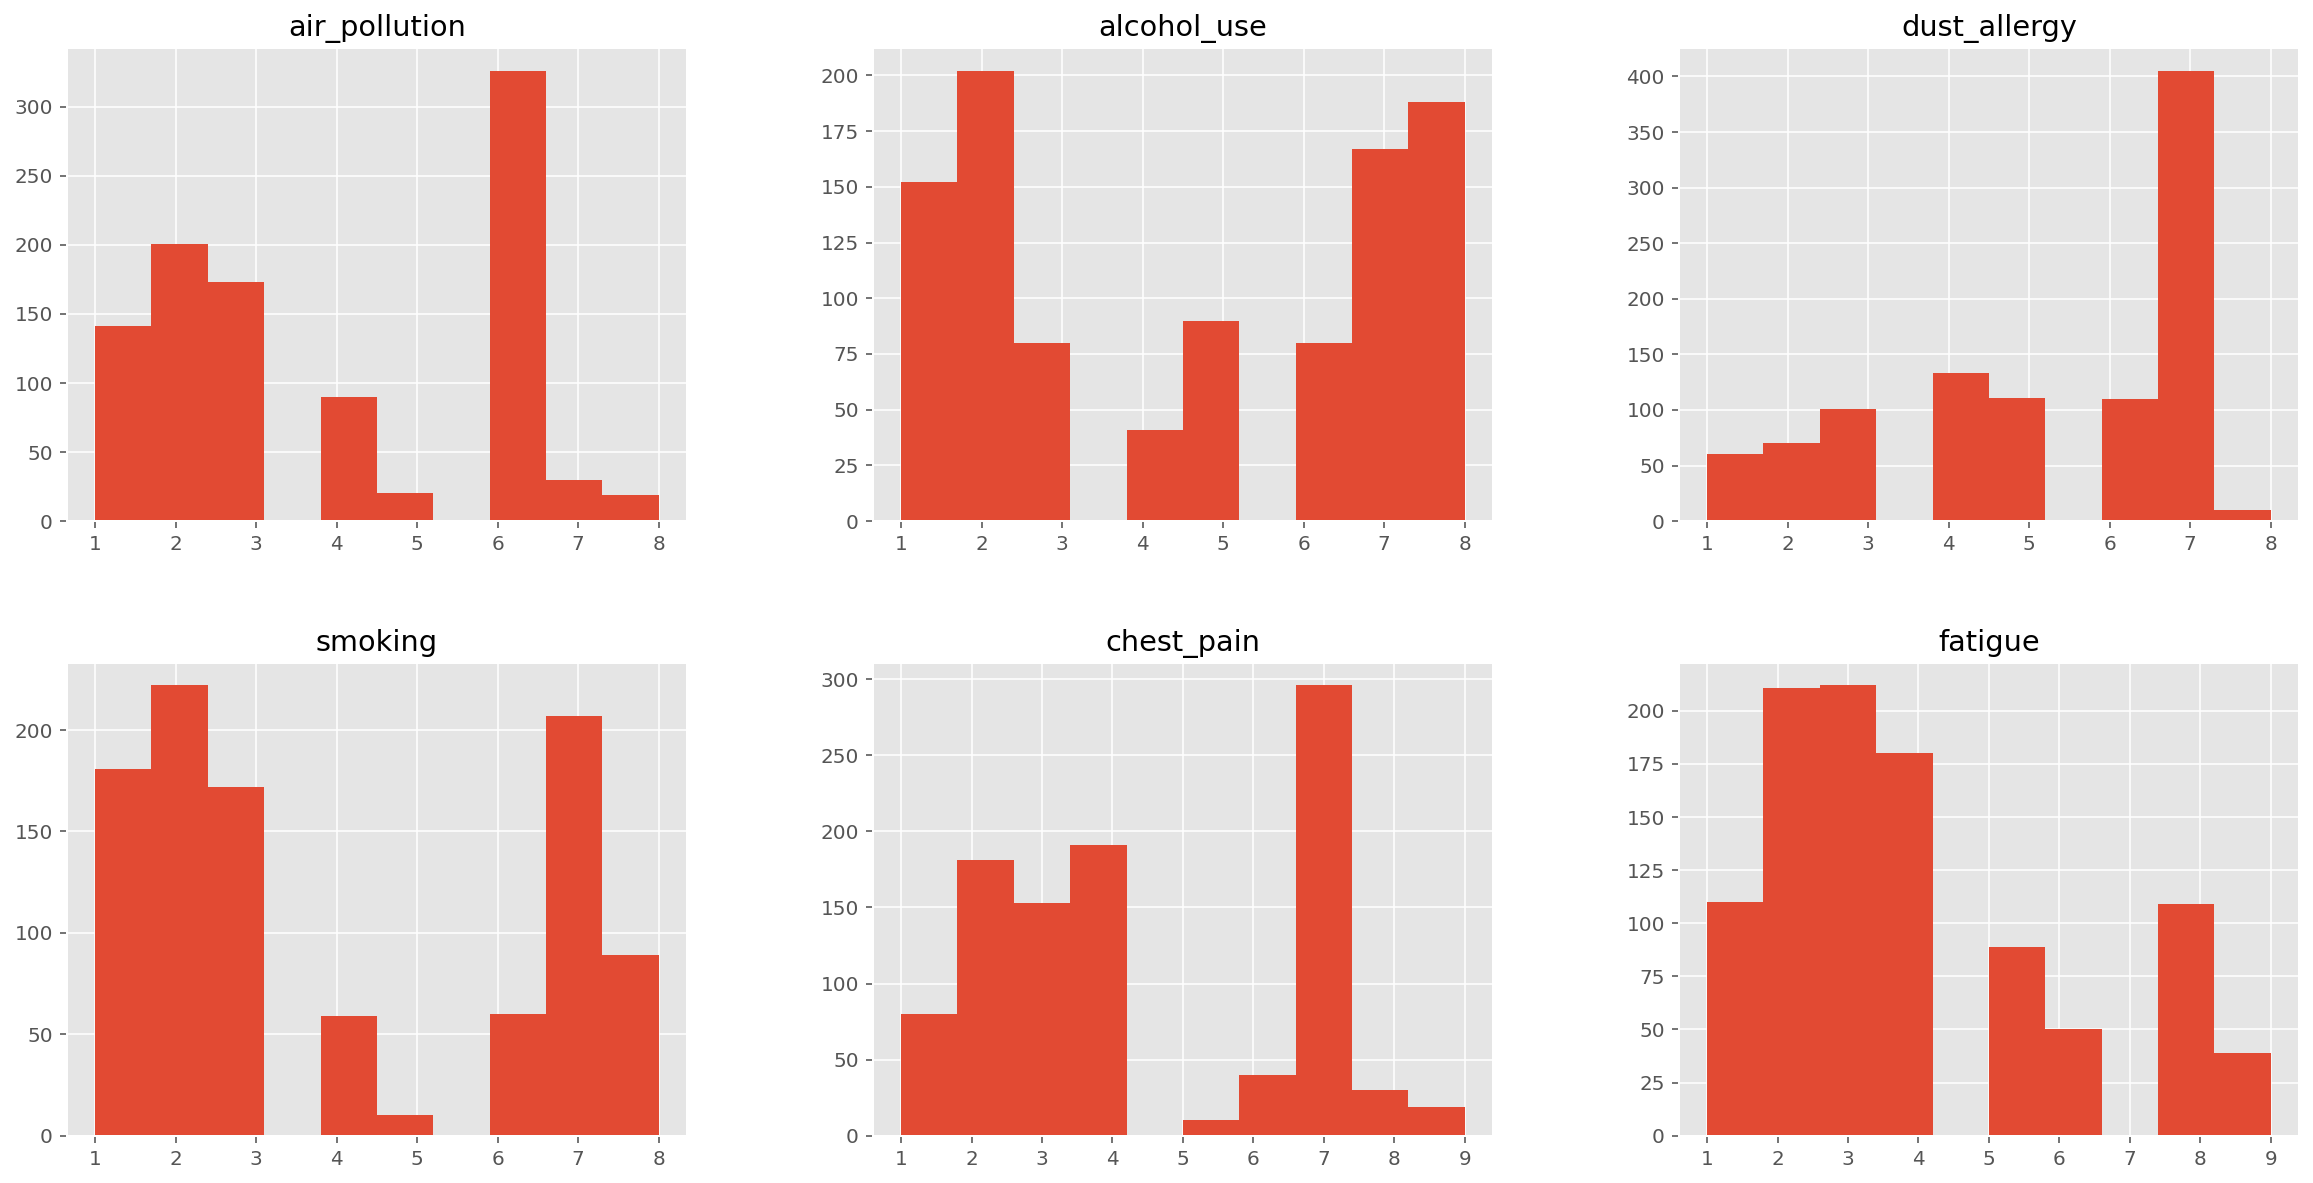

In [ ]:
# Histograms

print('\n')
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
ax = ax.flatten()
i = 0

for c in cols3:
    df.hist(c, figsize=(4,4), ax=ax[i], label=f'{c}')
    i = i + 1;
plt.show()
print('\n')


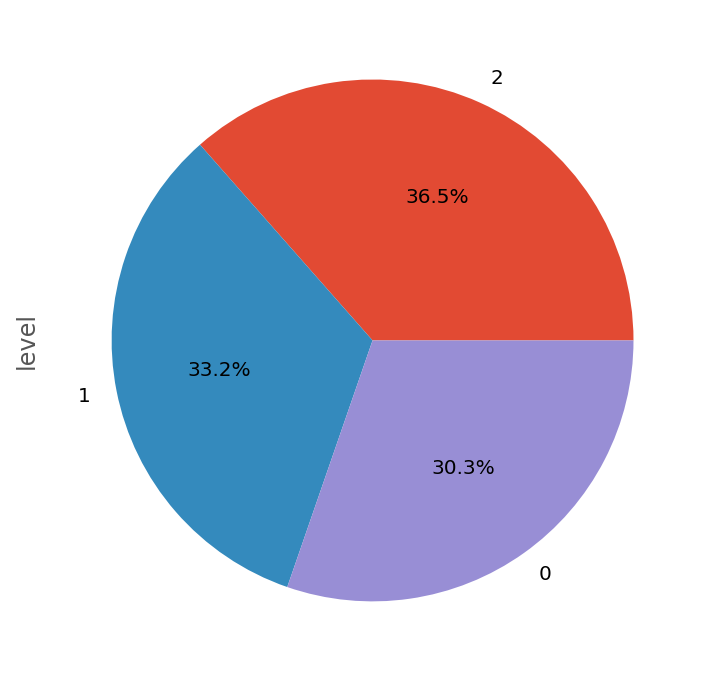

In [ ]:
# Pie Chart

df['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()


	Smoking and Label of Lung Cancer


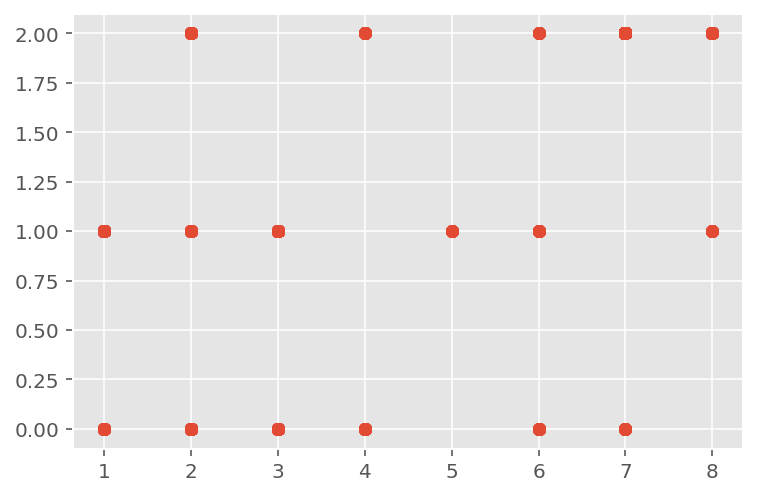




	Air Polution and Label of Lung Cancer


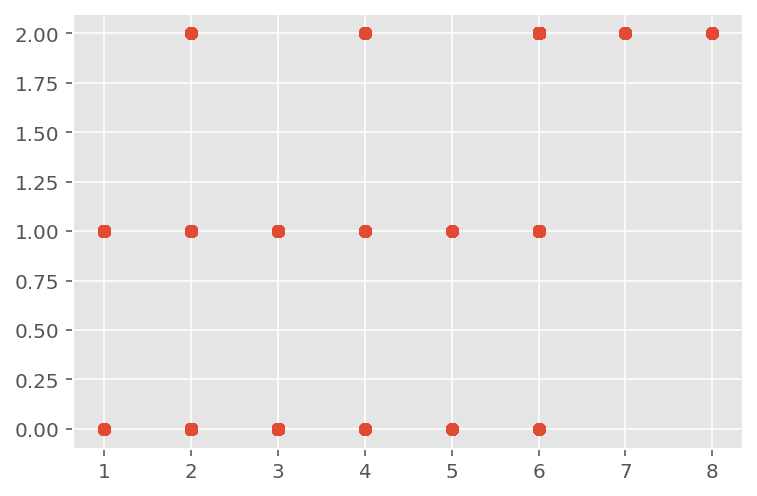

In [ ]:
# Scatter Plot

print('\n\tSmoking and Label of Lung Cancer')
plt.scatter(df['smoking'], df['level'])
plt.show()
print('\n')

print('\n\tAir Polution and Label of Lung Cancer')
plt.scatter(df['air_pollution'], df['level'])
plt.show()
print('\n')

In [ ]:
# Animated Scatter Plot

px.scatter(data_frame=df,
          x='age',
           y='smoking',
           size='air_pollution',
           color='level',
           title='Age, Smoking and Air Polution',
           labels={
               'age': 'Age',
               'air_pollution': 'Air Polution',
               'level': 'Lung Cancer Level',
               'smoking': 'Smoking',
               'gender': 'Gender'
           },
           log_x=True,
           range_y=[-5,15],
           hover_name='level',
           animation_frame='gender',
           height=800,
           size_max=100
          )

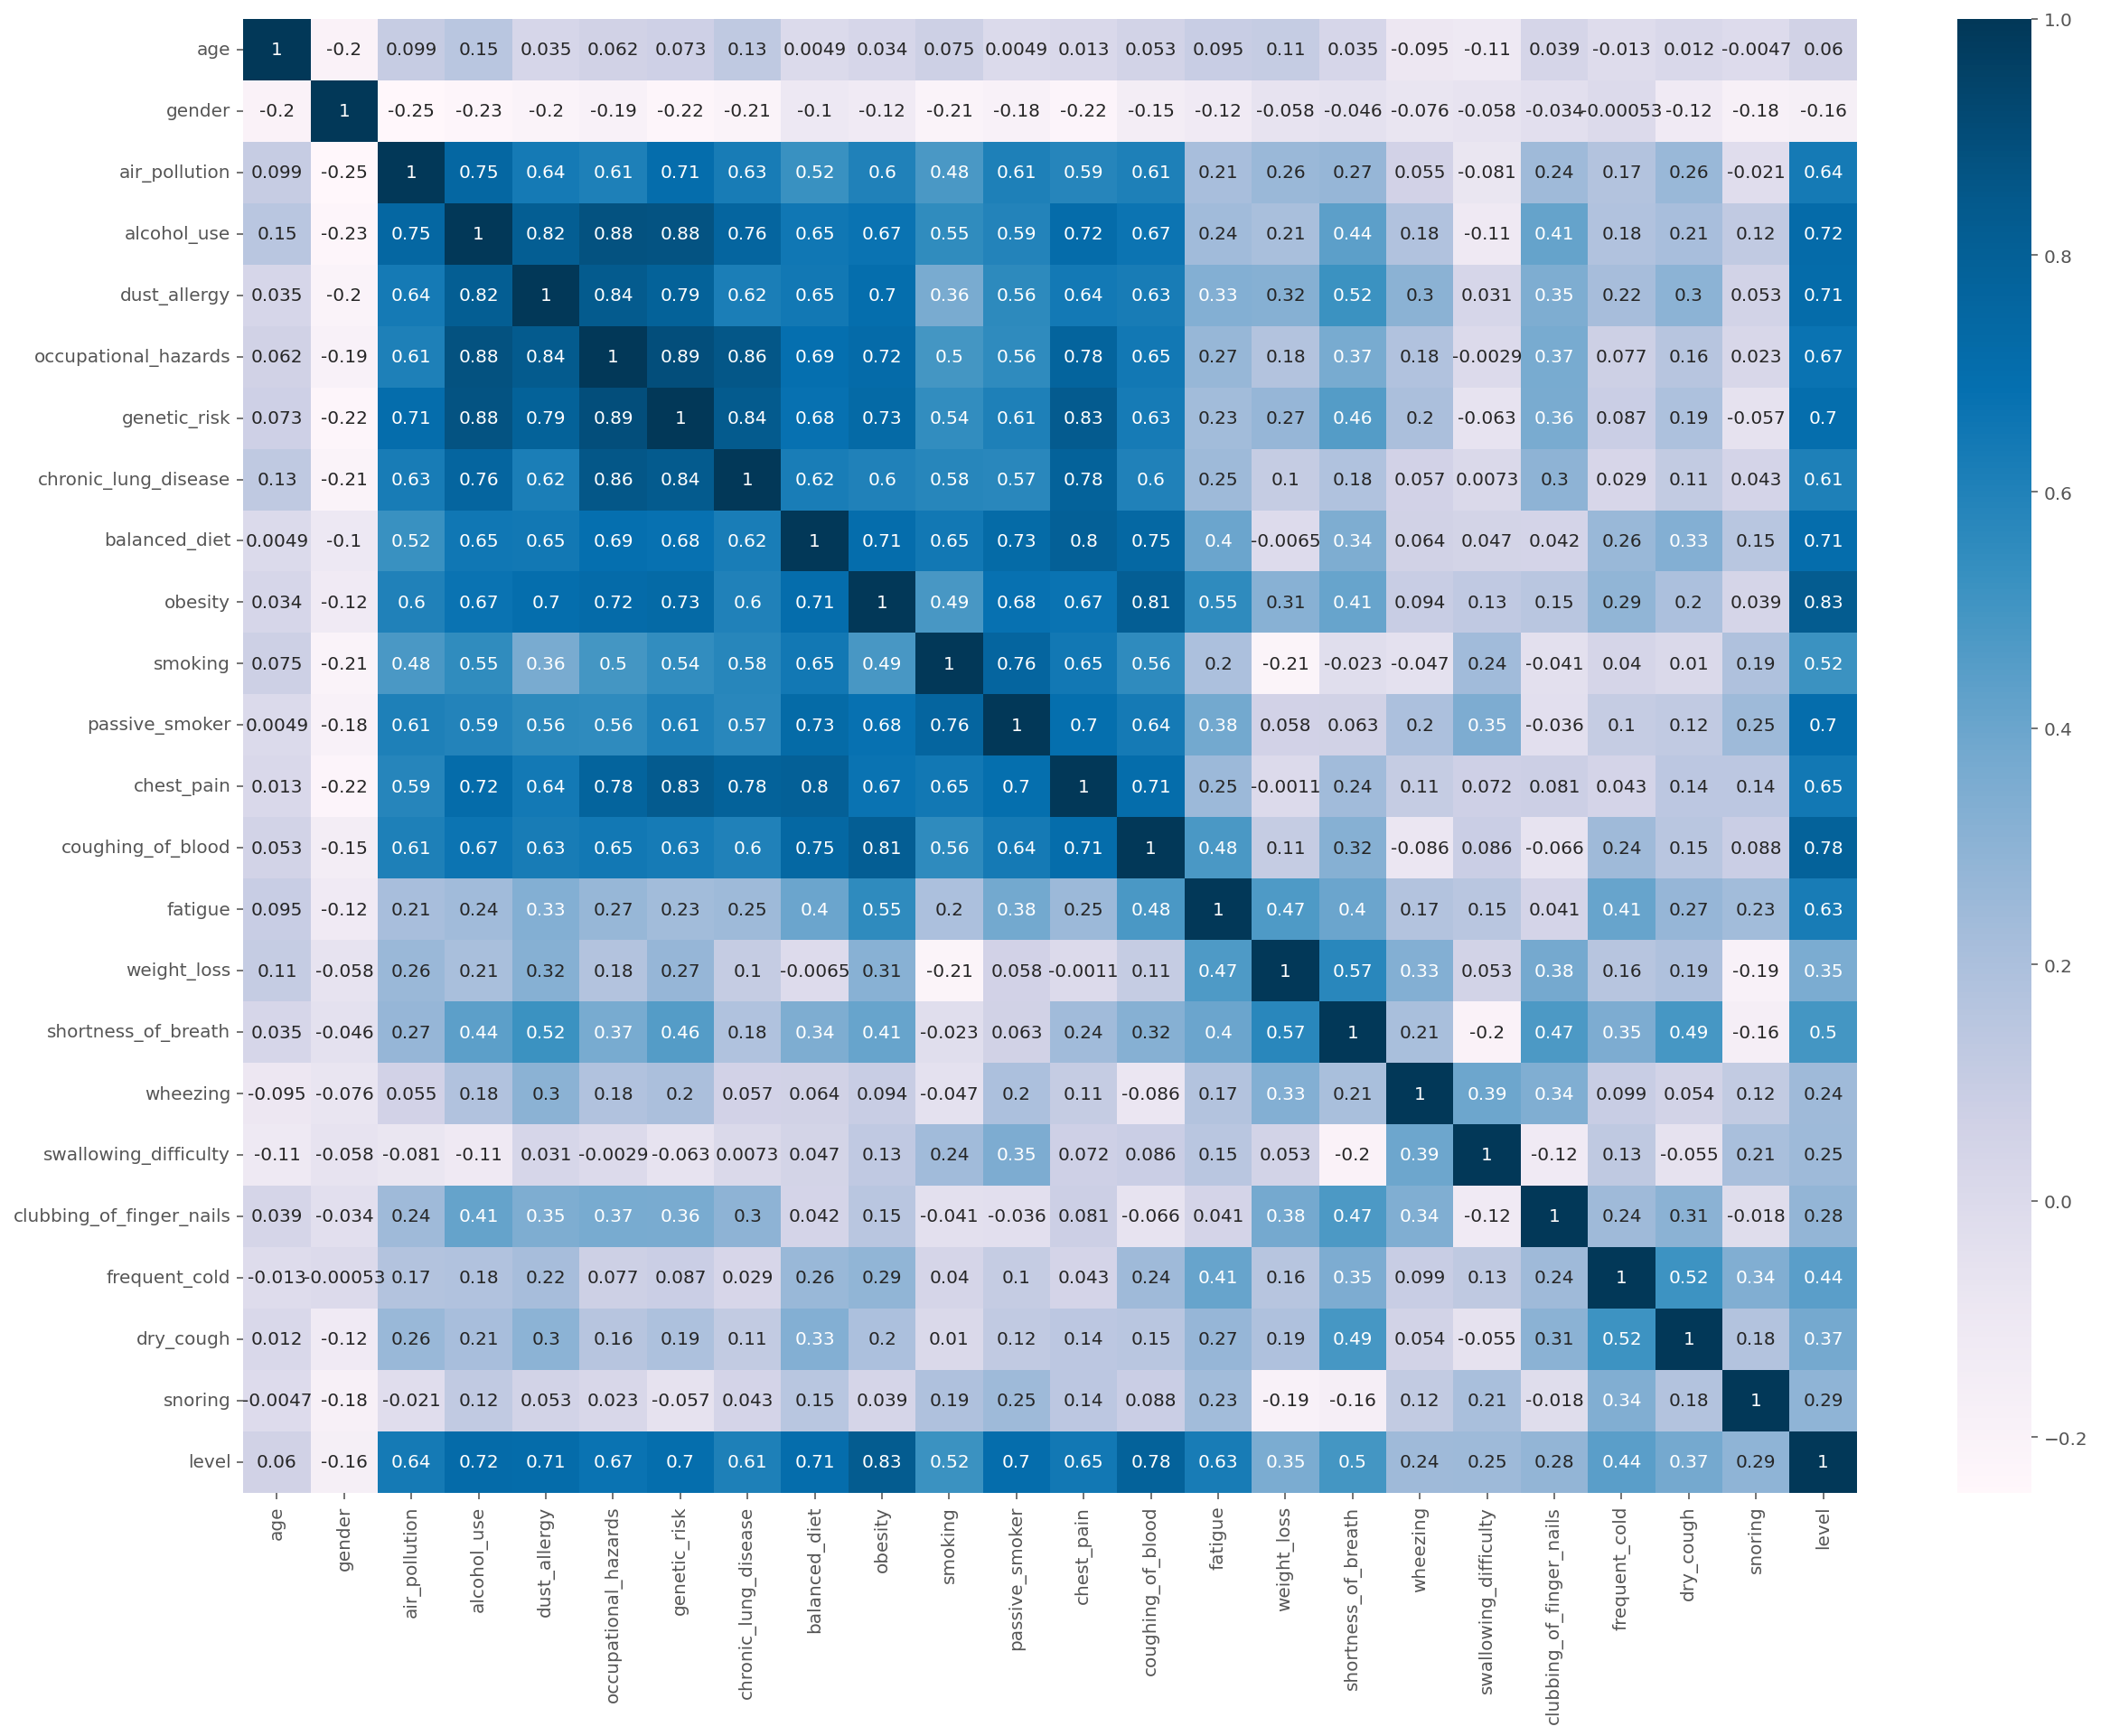

In [ ]:
# Heatmap

print('\n')
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()
print('\n')

Separating the independent and dependent columns for the proper prediction of the target column.

In [ ]:
# Setting Target

X = df.drop(columns='level')
y = df.level

print('\n')
display(X.head(), y[:10])
print('\n')

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
index,,,,,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


index
0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

In [ ]:
print('\n')
df.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')

In [ ]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)
print('\n')


Train Shape

X train shape:  (700, 23)
Y train shape:  (700,)


Test Shape

X test shape:  (300, 23)
Y test shape:  (300,)




Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
# Data Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

 Logistic regression estimates the probability of an event occurring, such as voted or didn't vote, based on a given dataset of independent variables.

In [ ]:
# Logistic Regression

logreg = LogisticRegression(C=24)

logreg.fit(X_train_scaled, y_train)

y_predict1 = logreg.predict(X_test_scaled)

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

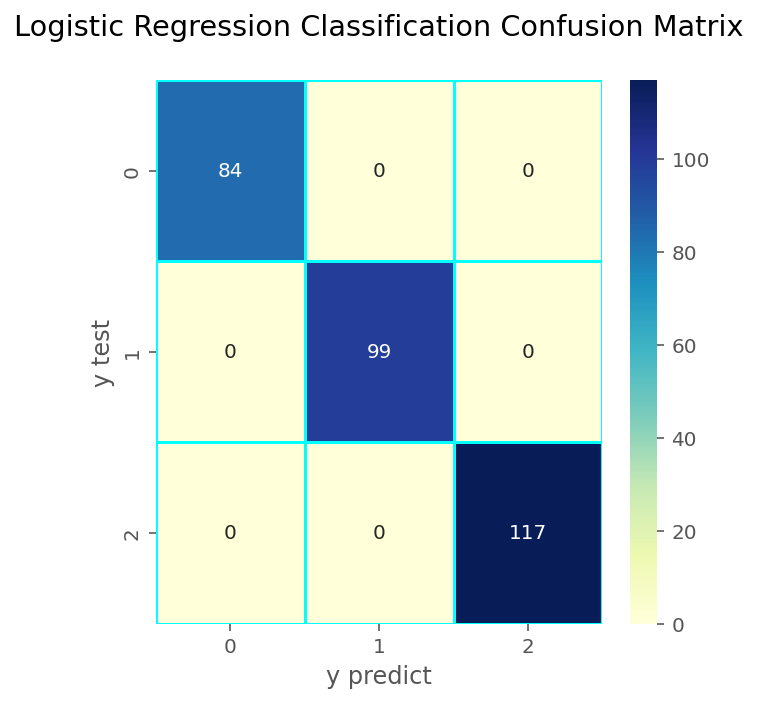

In [ ]:
# Confusion Matrix

logreg_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score

print('\n')
score_logreg = logreg.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_logreg)
print('\n')



Logistic Regression Score =  1.0




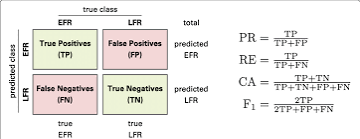

Precision is a metric that tells us about the quality of positive predictions.

Recall tells us about how well the model identifies true positives.

# F1 Score

It is the harmonic mean of precision and recall. It takes both false positive and false negatives into account. Therefore, it performs well on an imbalanced dataset.

In [ ]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))
print('\n')


Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





**Gaussian Naive Bayes** (GNB) is a classification technique used in Machine Learning (ML) based on the probabilistic approach and Gaussian distribution. Gaussian Naive Bayes assumes that each parameter (also called features or predictors) has an independent capacity of predicting the output variable

In [ ]:
# Gaussian Naive Bayes

nbcla = GaussianNB()

nbcla.fit(X_train_scaled, y_train)

y_predict2 = nbcla.predict(X_test_scaled)

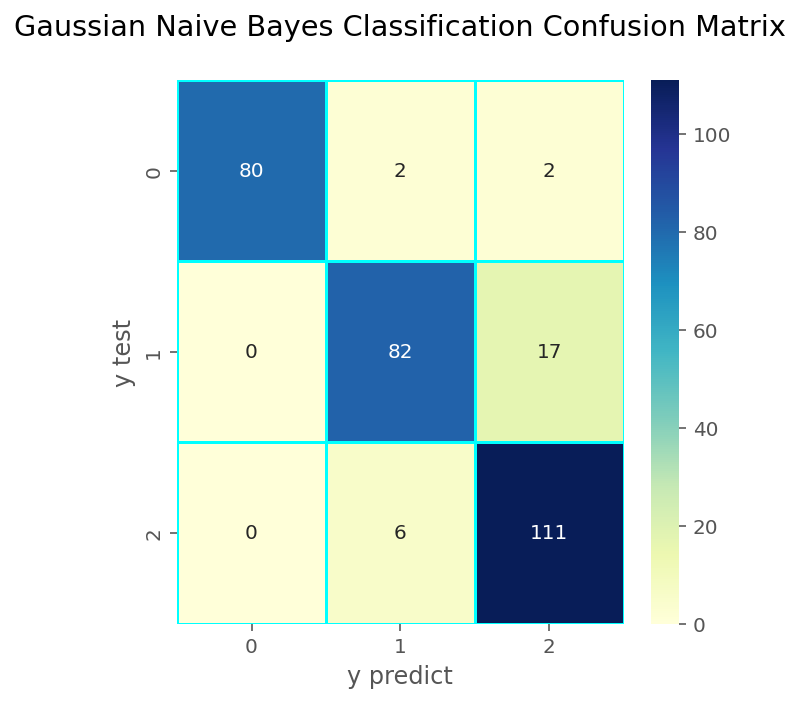

In [ ]:
# Confusion Matrix

nbcla_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score

print('\n')
score_nbcla = nbcla.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_nbcla)
print('\n')



Gaussian Naive Bayes Score =  0.91




In [ ]:
# Classification Report

print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))
print('\n')


Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300





A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

In [ ]:
# Decision Tree

dtcla = DecisionTreeClassifier(random_state=9)

dtcla.fit(X_train_scaled, y_train)

y_predict3 = dtcla.predict(X_test_scaled)

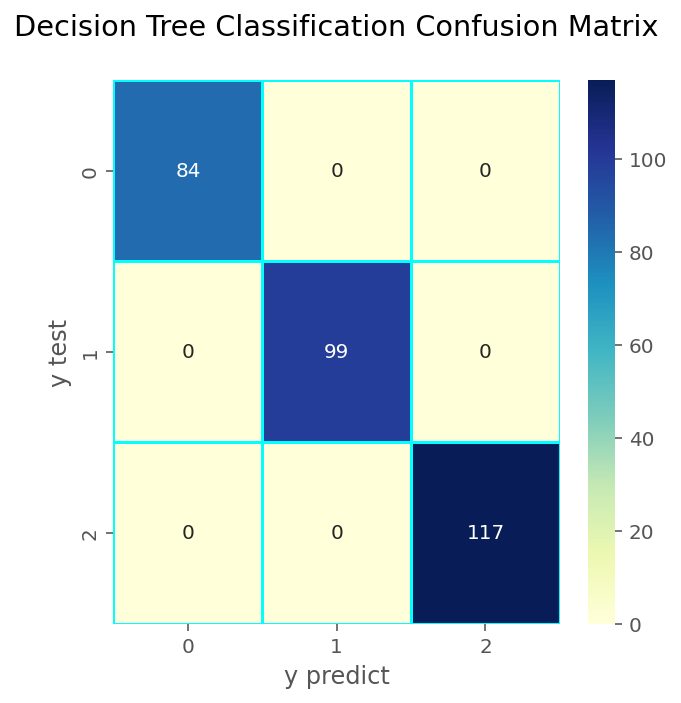

In [ ]:
# Confusion Matrix

dtcla_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

In [ ]:
# Test Score
print('\n')
score_dtcla = dtcla.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_dtcla)
print('\n')



Decision Tree Score =  1.0




In [ ]:
# Classification Report
print('\n\t\t\tClassification Tree for Decision Tree\n')
print(classification_report(y_test, y_predict3))
print('\n')


			Classification Tree for Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       117

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300





In [ ]:
# All Test Scores

print('\n')
Testscores = pd.Series([score_logreg, score_nbcla, score_dtcla], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ']) 
print(Testscores)
print('\n')



Logistic Regression Score =     1.00
Naive Bayes Score =             0.91
Decision Tree Score =           1.00
dtype: float64




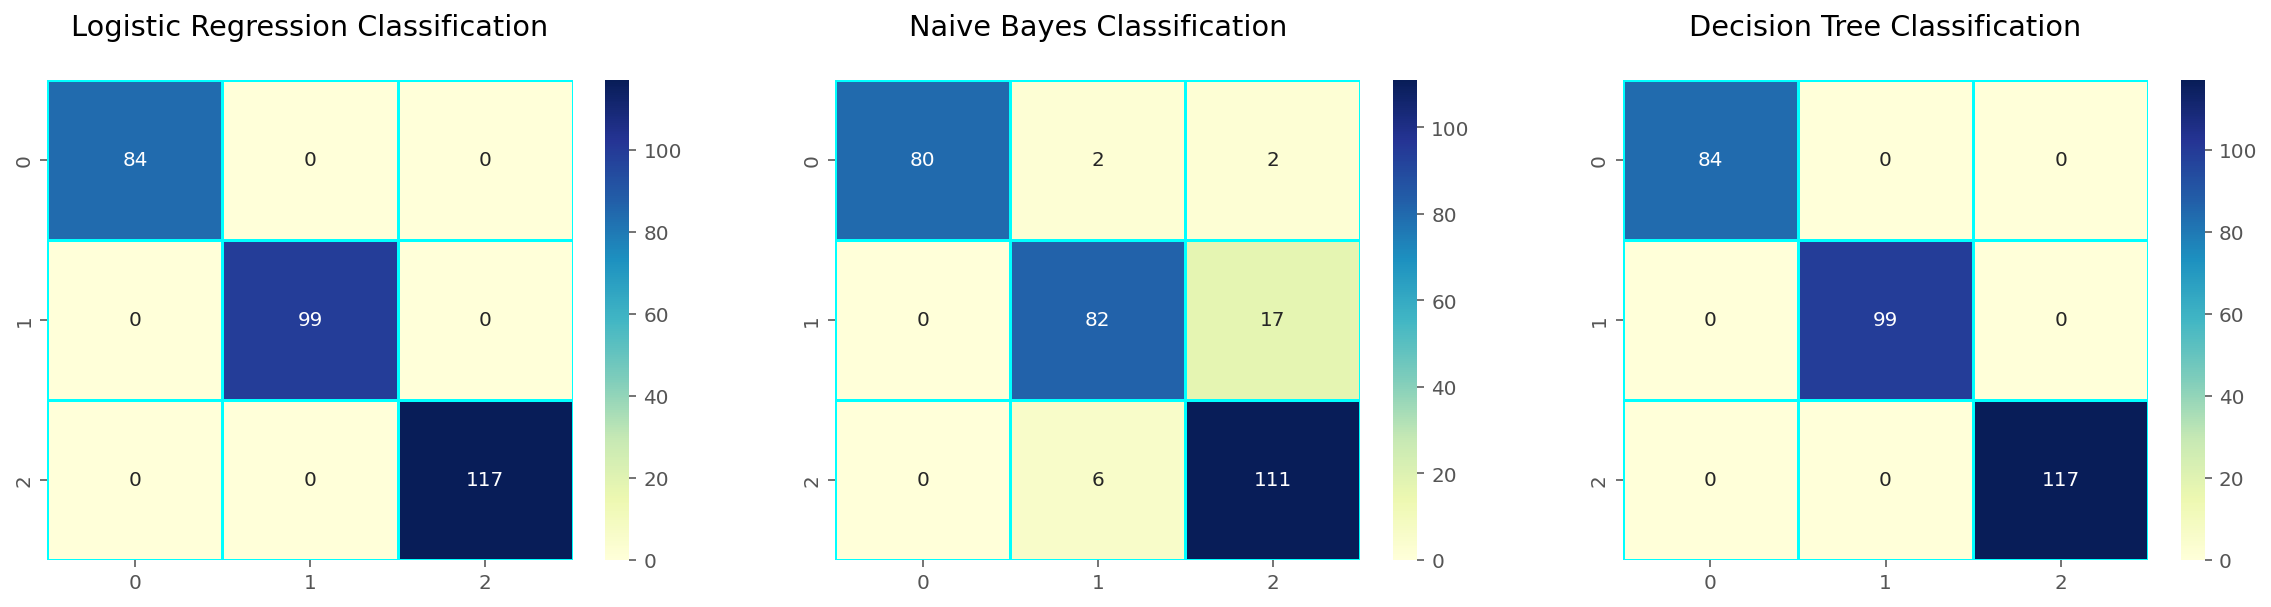

In [ ]:
# All Confusion Matrices

print('\n')
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(3, 3, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Decision Tree Classification\n')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)

plt.show()
print('\n')

In [ ]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree']
y = [score_logreg, score_nbcla, score_dtcla]

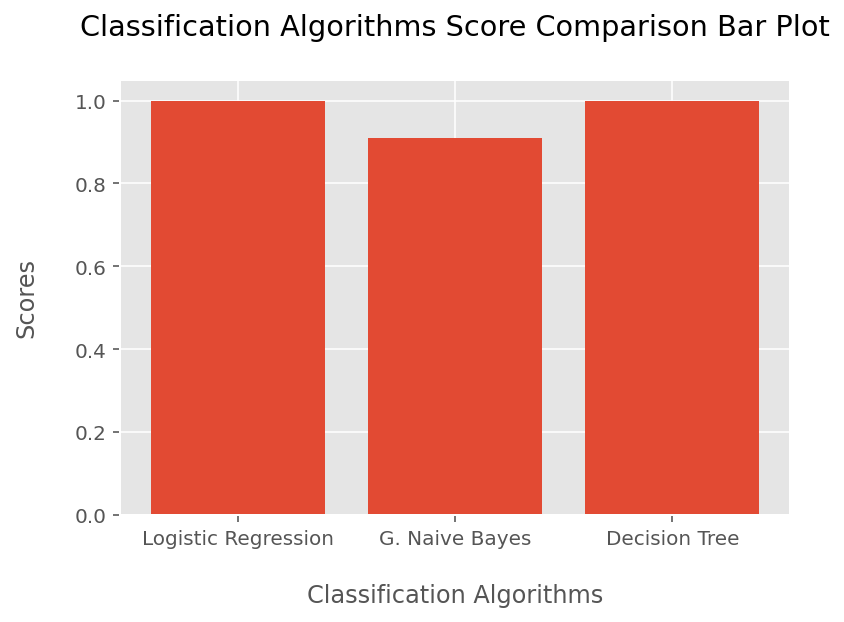

In [ ]:
# Bar Plot

print('\n')
plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()
print('\n')

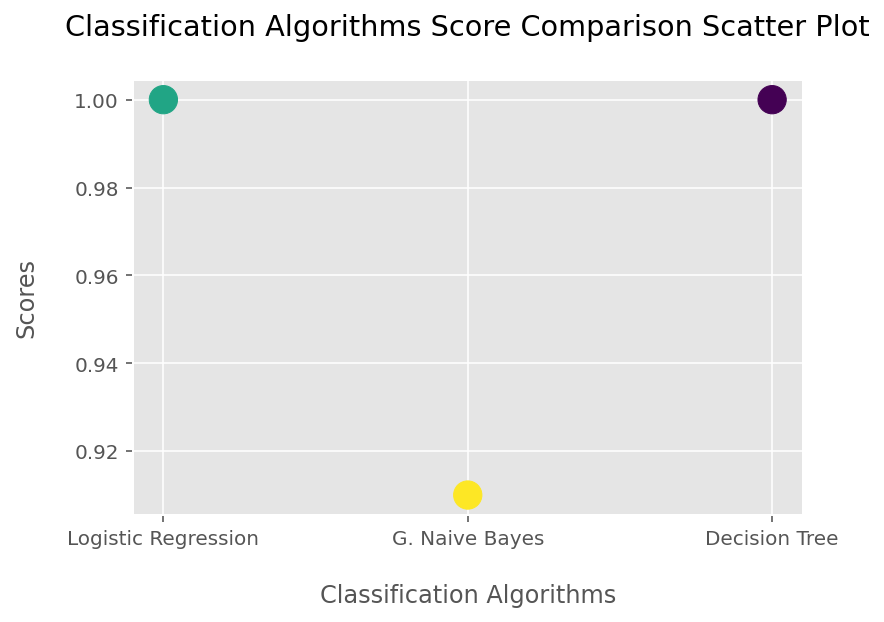

In [ ]:
# Scatter Plot

print('\n')
colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()
print('\n')

In [ ]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_logreg == score_nbcla and score_logreg == score_dtcla and score_nbcla == score_dtcla:
    al = True

if score_logreg == score_nbcla:
    ln = True
    
if score_logreg == score_dtcla:
    ld = True
    
if score_nbcla == score_dtcla:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_logreg > score_nbcla and score_logreg > score_dtcla:
        print('\nLogistic Regression Performs Better\n')
    if score_nbcla > score_logreg and score_nbcla > score_dtcla:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_dtcla > score_logreg and score_dtcla > score_nbcla:
        print('\nDecision Tree Performs Better\n')


Logistic Regression and Decision Tree Performs Better

